### Scrapper la base de donnée SIRENE

In [1]:
from api_insee import ApiInsee
import matplotlib.pyplot as plt
import pandas as pd
from api_insee.criteria import Field
from api_insee.criteria import Range

In [2]:
api = ApiInsee(
    key = 'mGKx4hZ_L7lpcWecNdoYZgX1Baka',
    secret = 'C1pKvig26nzeb1r9AtQOv6JU7p0a'
)

Essayons de comprendre au mieux cette base de données en observant les données sous différents angles. Faisons déjà ce qui nous parait le plus naturel est le plus intuitif

nombre de PME : 7725793
nombre d'ETI : 84964
nombre de GE : 40359
GE + ETI + PME = 7851116
Nombre d'entreprises catégorisé : 7851116
Nombre d'entreprises : 23566820


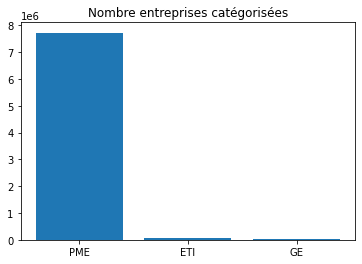

In [3]:
# Comprendre la proportion des différentes catégories d'entreprises

n_total = api.siren(q={}).get()['header']['total']
n_PME = api.siren(q={'categorieEntreprise' : 'PME'}).get()['header']['total']
n_ETI = api.siren(q={'categorieEntreprise' : 'ETI'}).get()['header']['total']
n_GE = api.siren(q={'categorieEntreprise' : 'GE'}).get()['header']['total']
n_nonref = n_total - n_PME - n_GE - n_ETI

print(f"nombre de PME : {n_PME}")
print(f"nombre d'ETI : {n_ETI}")
print(f"nombre de GE : {n_GE}")
print(f"GE + ETI + PME = {n_ETI+n_GE+n_PME}")
print(f"Nombre d'entreprises catégorisé : {n_total - n_nonref}")
print(f"Nombre d'entreprises : {n_total}")

categorieEntreprise = ['PME','ETI','GE']

plt.title('Nombre entreprises catégorisées')
plt.bar(categorieEntreprise,[n_PME,n_ETI,n_GE])
plt.show()

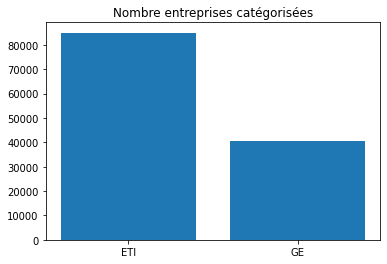

In [85]:
plt.title('Nombre entreprises catégorisées')
plt.bar(['ETI','GE'],[n_ETI,n_GE])
plt.show()

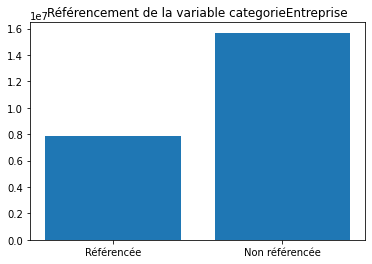

In [86]:
plt.title('Référencement de la variable categorieEntreprise')
plt.bar(['Référencée','Non référencée'],[n_PME + n_GE + n_ETI,n_nonref])
plt.show()

Il me paraitrait logique que la majorité des entreprises non référencées soit des PME, (à vérifier?)
Questions suivantes les entreprises non référencées sont-elles des entreprises inactives?
Regarder le nombre d'employé en fonction du nombre d'employé. 

In [87]:
tranches = [
    'NN',
    '01',
    '02',
    '03',
    '11',
    '12',
    '21',
    '22',
    '31',
    '32',
    '41',
    '42',
    '51',
    '52',
    '53'
]

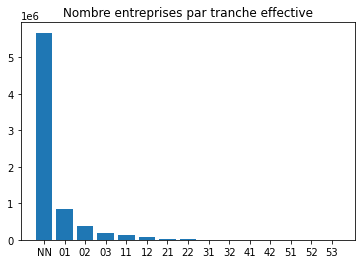

In [88]:
proportions = [
    api.siren(q={'trancheEffectifsUniteLegale': tranche}).get()['header']['total']
    for tranche in tranches
]

plt.title('Nombre entreprises par tranche effective')
plt.bar(tranches,proportions)
plt.show()

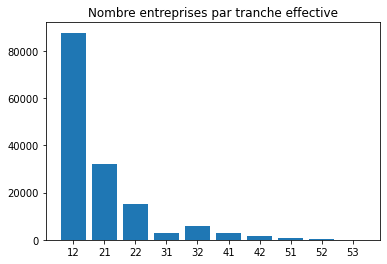

In [89]:
plt.title('Nombre entreprises par tranche effective')
plt.bar(tranches[5:],proportions[5:])
plt.show()

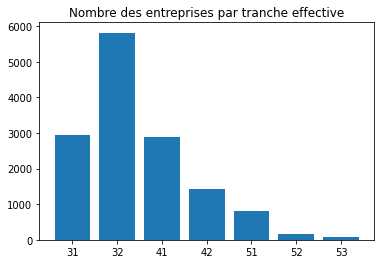

In [90]:
plt.title('Nombre des entreprises par tranche effective')
plt.bar(tranches[8:],proportions[8:])
plt.show()

Nombre d'entreprise avec un effectif renseigné : 7410108
Nombre total d'entreprise dans la base de donnée SIRENE : 23536648


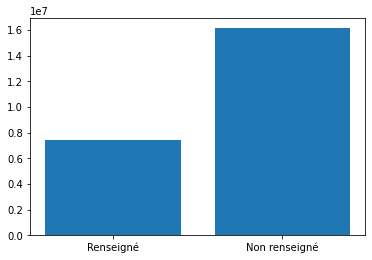

In [91]:
n_tranche = sum(proportions)
print(f"Nombre d'entreprise avec un effectif renseigné : {n_tranche}")
print(f"Nombre total d'entreprise dans la base de donnée SIRENE : {n_total}")
plt.bar(['Renseigné','Non renseigné'], [n_tranche,n_total-n_tranche])
plt.show()

Là aussi on peut faire la même hypothèse, les entreprises les moins bien référencées sont probablement les plus petites, avec un effectif dans la catégorie. On peut regarder s'il y a une forte corrélation entre le référencement de ces variables et le cessation d'activité? 

### Variables d'intérêt

Après étude des différentes variables il apparait qui si on enlève les variables auxiliaire et les variables de nom on trouve seulement 16 variables qui paraissent décrire toutes les entreprises. 

In [92]:
champs = [
    'dateCreationUniteLegale',
    'trancheEffectifsUniteLegale',
    'anneeEffectifsUniteLegale',
    'dateDernierTraitementUniteLegale',
    'nombrePeriodesUniteLegale',
    'categorieEntreprise',
    'anneeCategorieEntreprise',
    'etatAdministratifUniteLegale',
    'categorieJuridiqueUniteLegale',
    'activitePrincipaleUniteLegale',
    'nomenclatureActivitePrincipaleUniteLegale',
    'nicSiegeUniteLegale',
    'economieSocialeSolidaireUniteLegale',
    'caractereEmployeurUniteLegale',
    'societeMissionUniteLegale'
]

#### statutDiffusionUniteLegale

In [94]:
api.siren(q={'statutDiffusionUniteLegale' : 'O'}).get()['header']

{'statut': 200, 'message': 'OK', 'total': 23536648, 'debut': 0, 'nombre': 20}

Toutes les entreprises sont diffusibles (ça va sans dire, mais ça va mieux en le disant) 

#### dateCreationUniteLegale

Essayons de regarder le nombre d'entreprises fondées en 2012

In [96]:
api.siren(q=Range('dateCreationUniteLegale', '2012-01-01','2012-12-30')).get()['header']

{'statut': 200, 'message': 'OK', 'total': 622252, 'debut': 0, 'nombre': 20}

In [106]:
crees = [api.siren(q=Range('dateCreationUniteLegale', f"{annee}-01-01",f"{annee}-12-30")).get()['header']['total'] for annee in range(1900,2022)]

In [107]:
n_date = sum(crees)
print(n_date)

21539938


In [4]:
api.siren().get()

{'header': {'statut': 200,
  'message': 'OK',
  'total': 23566820,
  'debut': 0,
  'nombre': 20},
 'unitesLegales': [{'siren': '348657578',
   'statutDiffusionUniteLegale': 'O',
   'unitePurgeeUniteLegale': True,
   'dateCreationUniteLegale': '1988-10-01',
   'sigleUniteLegale': None,
   'sexeUniteLegale': 'F',
   'prenom1UniteLegale': 'BRIGITTE',
   'prenom2UniteLegale': 'VERONIQUE',
   'prenom3UniteLegale': None,
   'prenom4UniteLegale': None,
   'prenomUsuelUniteLegale': 'BRIGITTE',
   'pseudonymeUniteLegale': None,
   'identifiantAssociationUniteLegale': None,
   'trancheEffectifsUniteLegale': None,
   'anneeEffectifsUniteLegale': None,
   'dateDernierTraitementUniteLegale': None,
   'nombrePeriodesUniteLegale': 1,
   'categorieEntreprise': None,
   'anneeCategorieEntreprise': None,
   'periodesUniteLegale': [{'dateFin': None,
     'dateDebut': '1998-12-28',
     'etatAdministratifUniteLegale': 'C',
     'changementEtatAdministratifUniteLegale': True,
     'nomUniteLegale': 'DELMON

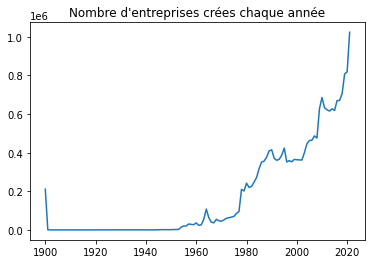

In [108]:

plt.plot(range(1900,2022),crees)
plt.title("Nombre d'entreprises crées chaque année")
plt.show()

On constate une hausse permanente du nombre d'entreprises créées au cours du temps, cela est cohérent avec la croissance économique française. On constate un plateau à partir des années 1990. Est-il possible de regarder cela par catégorie?

In [112]:
# Nombre de GE crees en 2012
api.siren(q=Range('dateCreationUniteLegale', '2012-01-01','2012-12-30') & Field('categorieEntreprise','GE')).get()['header']['total']

1102

In [118]:
GE_crees = [api.siren(q=Range('dateCreationUniteLegale', f"{annee}-01-01",f"{annee}-12-30") & Field('categorieEntreprise','GE')).get()['header']['total'] for annee in range(1900,2022)]
ETI_crees = [api.siren(q=Range('dateCreationUniteLegale', f"{annee}-01-01",f"{annee}-12-30") & Field('categorieEntreprise','ETI')).get()['header']['total'] for annee in range(1900,2022)]
PME_crees = [api.siren(q=Range('dateCreationUniteLegale', f"{annee}-01-01",f"{annee}-12-30") & Field('categorieEntreprise','PME')).get()['header']['total'] for annee in range(1900,2022)]

Exception: https://api.insee.fr/entreprises/sirene/V3/siren?q=dateCreationUniteLegale%3A%5B1900-01-01+TO+1900-12-30%5D+AND+categorieEntreprise%3AGE

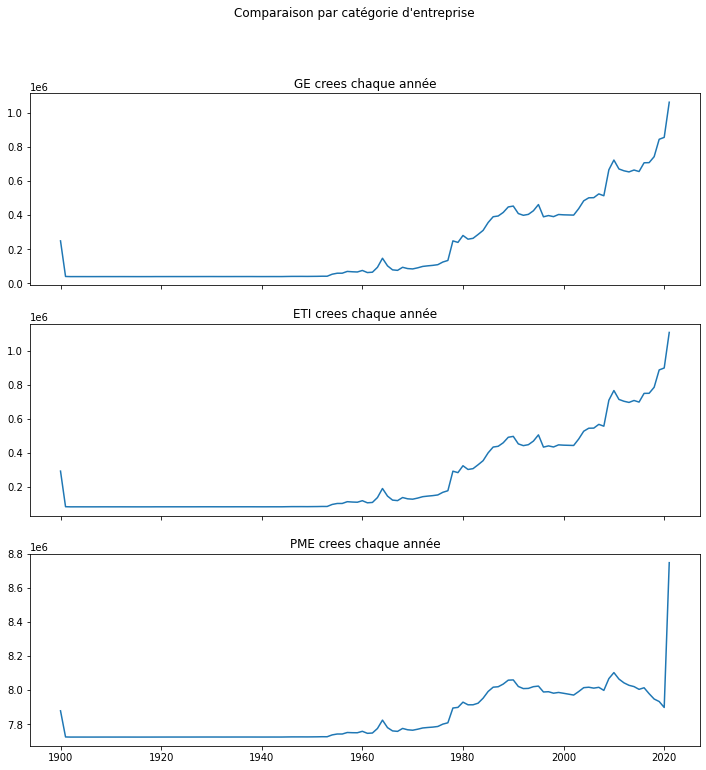

In [117]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, sharex=True,
                                    figsize=(12, 12))

ax0.set_title('GE crees chaque année')
ax0.plot(range(1900,2022),GE_crees)

ax1.set_title('ETI crees chaque année')
ax1.plot(range(1900,2022),ETI_crees)

ax2.set_title('PME crees chaque année')
ax2.plot(range(1900,2022),PME_crees)

fig.suptitle("Comparaison par catégorie d'entreprise")
plt.show()

In [17]:
api.siren(q={'categorieEntreprise' : 'GE'}).get()['header']['total']

40359

In [ ]:
api.siren()